# Script comparing L-HITS scheme with various latent dimensions
### This is a sensitivity analysis study
### Asif Hamid Bhat 
# 16-03-2024

In [1]:
# clear ram
# import torch
# with torch.no_grad():
#     torch.cuda.empty_cache()
# %reset

In [3]:
########## imports  ##############
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import pickle
import warnings
warnings.filterwarnings('ignore')
# Path for various functions
module_path= os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import torch

In [4]:
# paths
noise = 0.0 
system = 'FHN'  
path_to_result=os.path.join('../results/', system)

In [5]:
path_to_result

'../results/FHN'

In [6]:
with open(path_to_result+'/MSE_1.pickle', 'rb') as file:
    mse_1= pickle.load(file)
with open(path_to_result+'/MSE_2.pickle', 'rb') as file:
    mse_2= pickle.load(file)
with open(path_to_result+'/MSE_4.pickle', 'rb') as file:
    mse_4= pickle.load(file)
with open(path_to_result+'/MSE_6.pickle', 'rb') as file:
    mse_6= pickle.load(file)
with open(path_to_result+'/MSE_8.pickle', 'rb') as file:
    mse_8= pickle.load(file)
with open(path_to_result+'/MSE_10.pickle', 'rb') as file:
    mse_10= pickle.load(file)

In [7]:
mse_1_train=mse_1['aehits_mse_train']
mse_1_test=mse_1['aehits_mse_test']
mse_2_train=mse_2['aehits_mse_train']
mse_2_test=mse_2['aehits_mse_test']
mse_4_train=mse_4['aehits_mse_train']
mse_4_test=mse_4['aehits_mse_test']
mse_6_train=mse_6['aehits_mse_train']
mse_6_test=mse_6['aehits_mse_test']
mse_8_train=mse_8['aehits_mse_train']
mse_8_test=mse_8['aehits_mse_test']
mse_10_train=mse_10['aehits_mse_train']
mse_10_test=mse_10['aehits_mse_test']
mse_train=[mse_1_train,mse_2_train,mse_4_train,mse_6_train,mse_8_train,mse_10_train]
mse_test=[mse_1_test,mse_2_test,mse_4_test,mse_6_test,mse_8_test,mse_10_test]

In [8]:
mse_8

{'aehits_mse_test': array([2.5993894e-04, 2.9000919e-04, 2.9443533e-04, ..., 8.0485042e-05,
        7.6261073e-05, 6.2387116e-05], dtype=float32),
 'aehits_mse_train': array([2.0578862e-04, 1.9331378e-04, 1.8595860e-04, ..., 3.5759382e-04,
        3.5750284e-04, 9.9540430e-06], dtype=float32)}

### Training data plot LHITS vs latent dimension

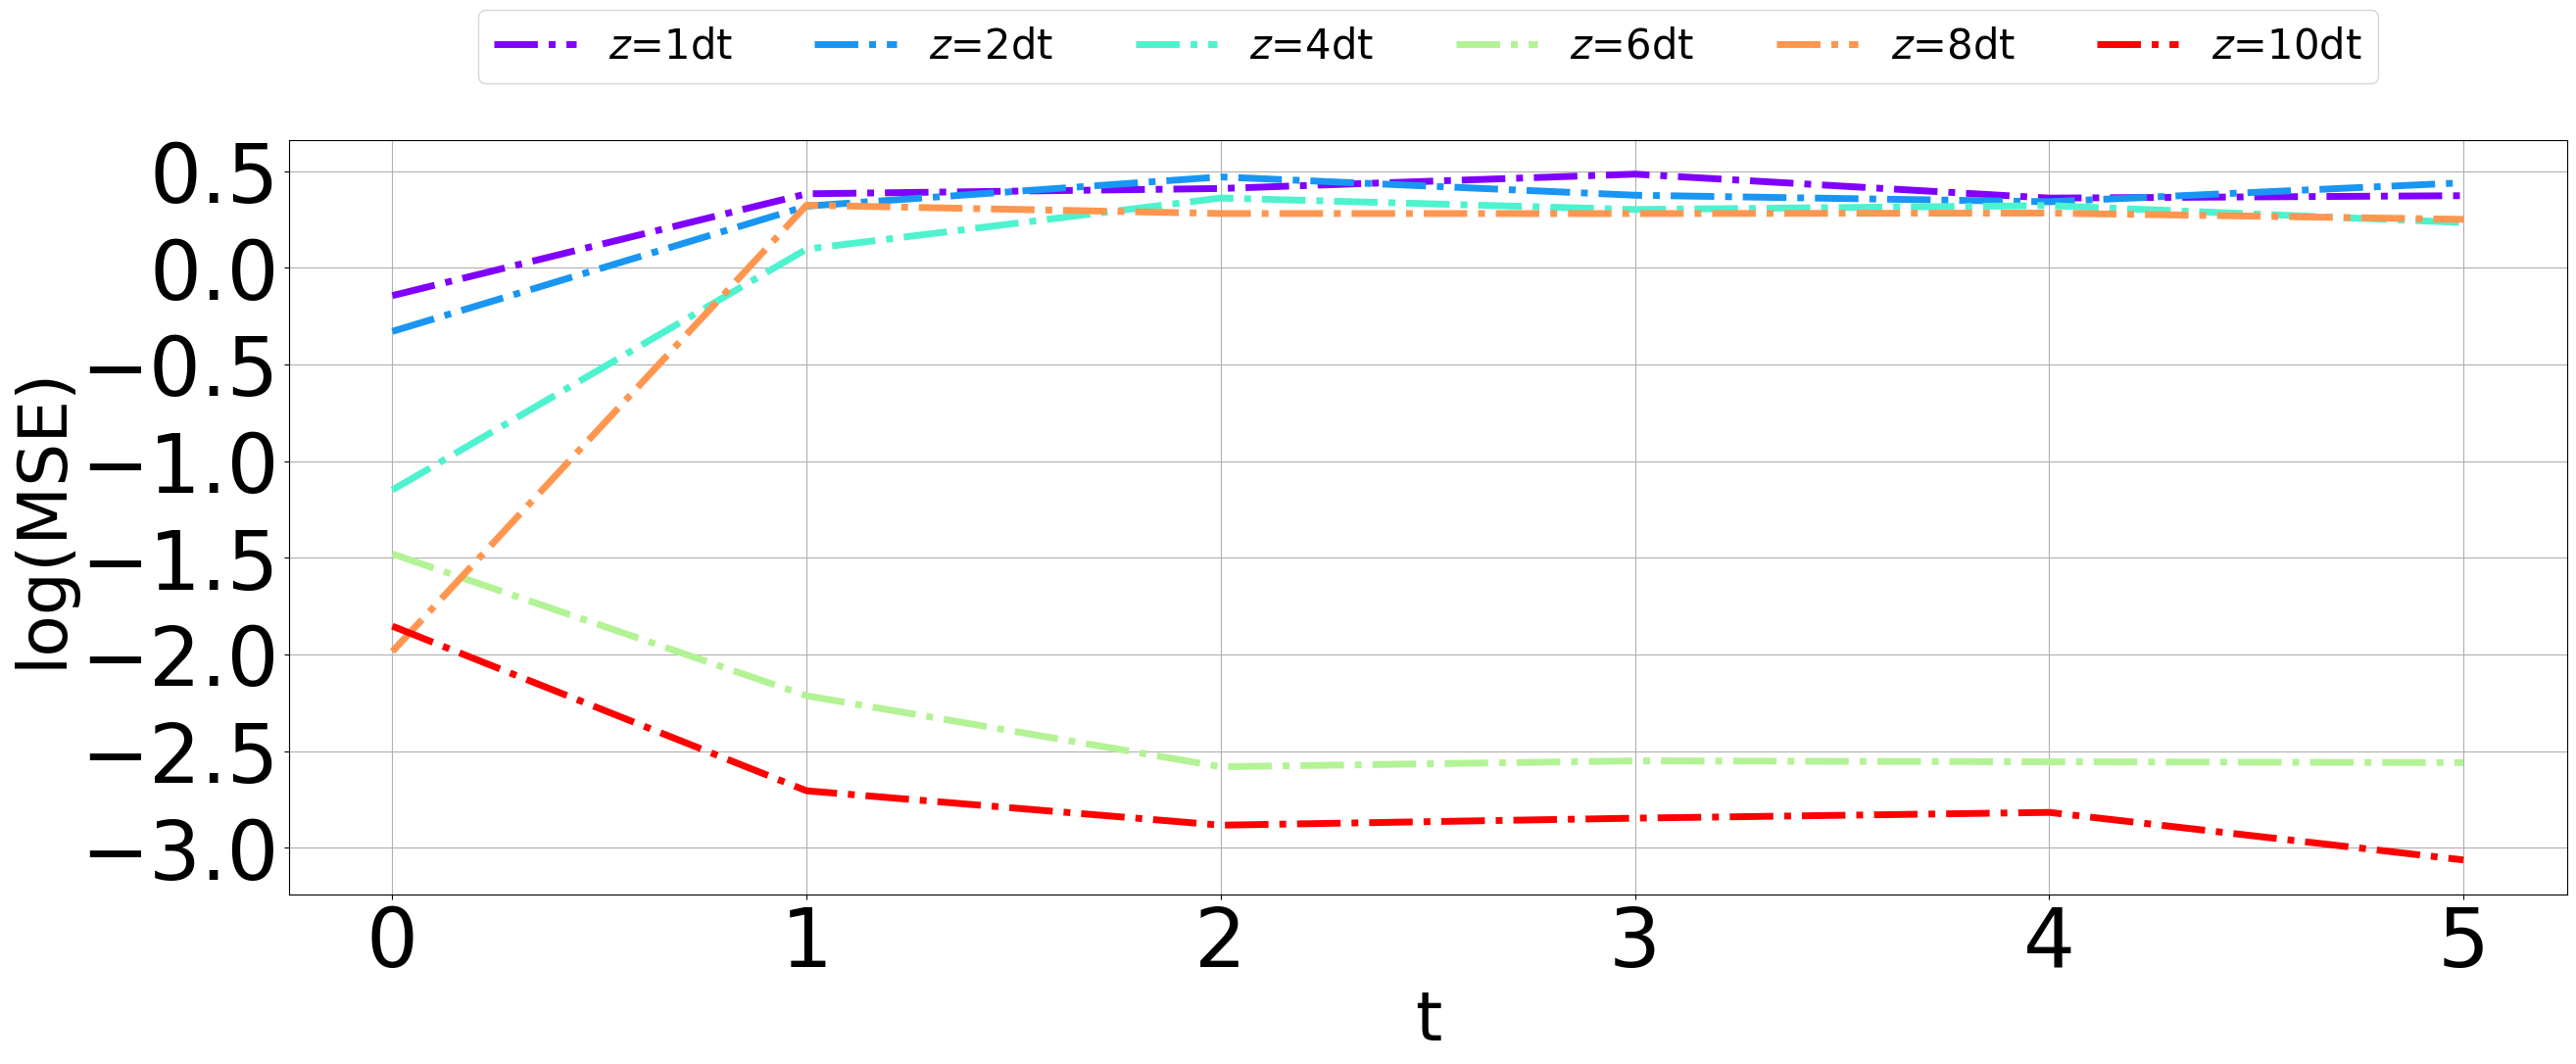

In [11]:
fig = plt.figure(figsize=(30, 10))
zs=[1,2,4,6,8,10]
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(mse_train))))
mean_pointwise=list()
indices=np.arange(0,5120,1000)
# multiscale_err = multiscale_preds_mse.mean(0).cpu().detach().numpy()
#Figure1: error plot
for k in range(len(mse_train)):
    mse_tn = mse_train[k]
    rgb = next(colors)
    mse_tn[indices]
    plt.plot(np.log10(mse_tn[indices]), linestyle='dashdot',color=rgb, linewidth=5, label='$z$={}dt'.format(zs[k]))
plt.legend(fontsize=30, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.2))
plt.xlabel('t', fontsize=50)  
plt.ylabel('log(MSE)', fontsize=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid()
# figname='/MSEvsZs_train.png'
# plt.savefig(path_to_result+figname, bbox_inches='tight')
plt.show()

### Testing data Plot LHTS vs Latent dimension

In [23]:
# mse_test[0]

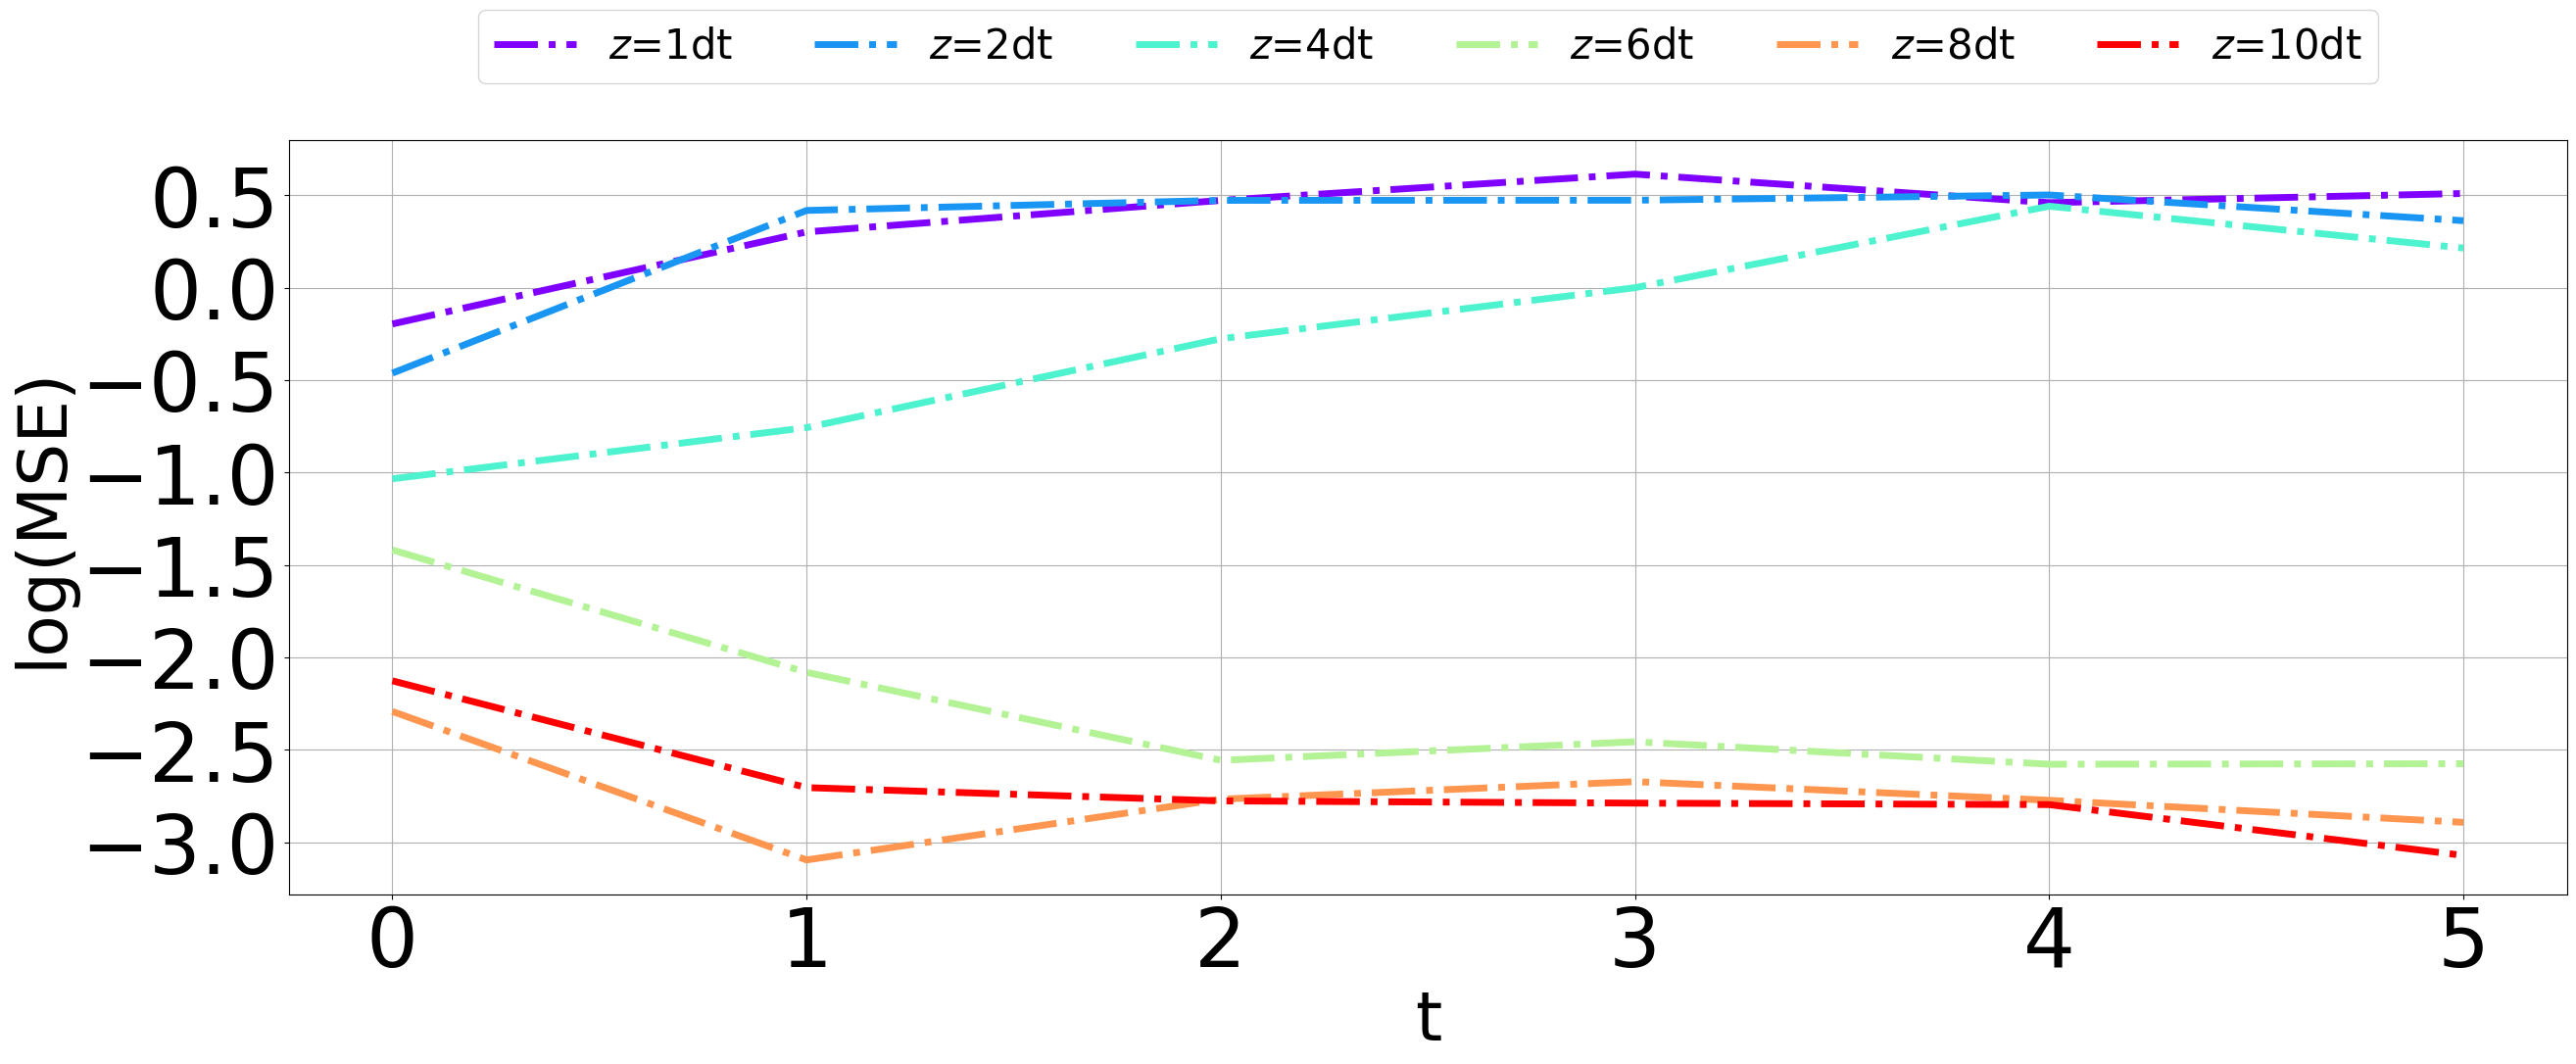

In [13]:
fig = plt.figure(figsize=(30, 10))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(mse_test))))
mean_pointwise=list()
zs=[1,2,4,6,8,10]
indices=np.arange(0,5120,1000)
#Figure1: error plot
for k in range(len(mse_test)):
    mse_tt = mse_test[k]
    rgb = next(colors)
    plt.plot(np.log10(mse_tt[indices]), linestyle='dashdot',color=rgb, linewidth=5, label='$z$={}dt'.format(zs[k]))
plt.legend(fontsize=30, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.2))
plt.xlabel('t', fontsize=50)  
plt.ylabel('log(MSE)', fontsize=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid()
figname='/MSEvsZs_test.png'
plt.savefig(path_to_result+figname, bbox_inches='tight')
# plt.show()